# Data Exploration and Understanding

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/FINPRO DS DBB/weatherAUS.csv'
df = pd.read_csv(file_path)

## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


### Background

Banyak orang yang memiliki komunitas sepak bola rugi karena saat mereka mengadakan main bareng tiba tiba cuaca hujan dan banyak yang tidak ikut serta, sehingga ini menyebabkan kerugian karena lapangan tidak bisa di reschedule atau di refund pada hari h.

### Data Explanation

Terdapat 145,460 data dengan 23 kolum.

Penjelasan dari setiap kolom:

- Date -> Tanggal observasi
- Location -> nama kota tempat pengukuran
- MinTemp -> Suhu minimum harian (dalam celcius)
- MaxTemp -> Suhu maximum harian (dalam celcius)
- Rainfall -> Curah hujan (mm) dalam 24 jam terakhir
- Evaporation -> penguapan (mm) dalam 24 jam terakhir
- Sunshine -> Lama penyinaran matahari di hari itu
- WindGustDir -> Arah angin maksimum (gust) yang tercatat
- WindGustSpeed -> Kecepatan maksimum angin kencang (km/h)
- WindDir9am -> Arah angin pada pukul 9 pagi
- WindDir3pm -> Arah angin pada pukul 3 sore
- WindSpeed9am -> Kecepatan angin (km/h) pada pukul 9 pagi
- WindSpeed3pm -> Kecepatan angin (km/h) pada pukul 3 sore
- Humidity9am -> Kelembaban udara (%) pada pukul 9 pagi
- Humidity3pm -> Kelembaban udara (%) pada pukul 3 sore
- Pressure9am -> Tekanan atmosfer (hPa) pada pukul 9 pagi
- Pressure3pm -> Tekanan atmosfer (hPa) pada pukul 3 sore
- Cloud9am -> Persentase tutupan awan pada pukul 9 pagi (skala 0–8 oktas)
- Cloud3pm -> Persentase tutupan awan pada pukul 3 sore (skala 0–8 oktas)
- Temp9am -> Suhu udara (°C) pada pukul 9
- Temp3pm -> Suhu udara (°C) pada pukul 3 sore
- RainToday -> Indikator apakah hujan turun hari ini (Yes/No)
- RainTomorrow -> apakah akan hujan besok atau tidak

# Data Cleaning

## Duplicate data check

In [8]:
# mengecek duplikat

df.duplicated().sum()

np.int64(0)

tidak ada data yang duplikat

## Missiung value check

In [9]:
# cek missin value

df.isna().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [10]:
# menghapus  missing value

df.dropna(inplace=True)

In [11]:
df.isna().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [12]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

tersisa 56,420 data setelah saya cleaning

# Data Manipulation

## Konversi Date ke datetime

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           56420 non-null  datetime64[ns]
 1   Location       56420 non-null  object        
 2   MinTemp        56420 non-null  float64       
 3   MaxTemp        56420 non-null  float64       
 4   Rainfall       56420 non-null  float64       
 5   Evaporation    56420 non-null  float64       
 6   Sunshine       56420 non-null  float64       
 7   WindGustDir    56420 non-null  object        
 8   WindGustSpeed  56420 non-null  float64       
 9   WindDir9am     56420 non-null  object        
 10  WindDir3pm     56420 non-null  object        
 11  WindSpeed9am   56420 non-null  float64       
 12  WindSpeed3pm   56420 non-null  float64       
 13  Humidity9am    56420 non-null  float64       
 14  Humidity3pm    56420 non-null  float64       
 15  Pressure9am    56420

## Set Index

In [16]:
df = df.set_index('Date')

## Encode variabel kategorikal

In [17]:
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [18]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


## Label Encoding

karena ada beberapa arah mata angin saya menggunakan label encoding

In [19]:
le = LabelEncoder()
wind_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for col in wind_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

In [20]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [21]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
mapping_df = pd.DataFrame(list(mapping.items()), columns=["Kategori", "Encoded_Value"])
display(mapping_df)

,Kategori,Encoded_Value
0,E,0
1,ENE,1
2,ESE,2
3,N,3
4,NE,4
5,NNE,5
6,NNW,6
7,NW,7
8,S,8
9,SE,9


## Feature Engineering

### Menambahkan Kolom Tahun

In [22]:
df['Year'] = df.index.year

### Menambahkan Kolom Bulan

In [23]:
df['Month'] = df.index.month

### Menambahkan Kolom Hari

In [24]:
df['Day'] = df.index.day

## Menambahkan Day of Week

In [25]:
df['DayOfWeek'] = df.index.dayofweek

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56420 entries, 2009-01-01 to 2017-06-24
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  object 
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   Evaporation    56420 non-null  float64
 5   Sunshine       56420 non-null  float64
 6   WindGustDir    56420 non-null  int64  
 7   WindGustSpeed  56420 non-null  float64
 8   WindDir9am     56420 non-null  int64  
 9   WindDir3pm     56420 non-null  int64  
 10  WindSpeed9am   56420 non-null  float64
 11  WindSpeed3pm   56420 non-null  float64
 12  Humidity9am    56420 non-null  float64
 13  Humidity3pm    56420 non-null  float64
 14  Pressure9am    56420 non-null  float64
 15  Pressure3pm    56420 non-null  float64
 16  Cloud9am       56420 non-null  float64
 17  Cloud3pm       56420 non-null  fl

In [27]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,2.0,5.0,26.6,33.4,0,0,2009,1,1,3
2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,1.0,1.0,20.3,27.0,0,0,2009,1,2,4
2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,...,1.0,6.0,28.7,34.9,0,0,2009,1,4,6
2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,...,1.0,5.0,29.1,35.6,0,0,2009,1,5,0
2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,...,1.0,6.0,33.6,37.6,0,0,2009,1,6,1


In [28]:
df.tail()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,1,35.0,9,4,...,0.0,1.0,24.5,32.3,0,0,2017,6,20,1
2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,0,37.0,9,9,...,7.0,0.0,24.8,32.0,0,0,2017,6,21,2
2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,0,33.0,0,13,...,0.0,0.0,24.8,32.1,0,0,2017,6,22,3
2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,2,26.0,9,6,...,1.0,1.0,24.8,29.2,0,0,2017,6,23,4
2017-06-24,Darwin,20.2,31.7,0.0,5.6,10.7,1,30.0,1,6,...,6.0,5.0,25.4,31.0,0,0,2017,6,24,5


In [29]:
print(df['Year'].unique())

[2009 2010 2011 2012 2013 2014 2015 2016 2017 2007 2008]


In [30]:
bulan_per_tahun = df.groupby("Year")["Month"].unique().reset_index()
bulan_per_tahun.columns = ["Year", "Available Months"]
print(bulan_per_tahun)

    Year                         Available Months
0   2007                                 [11, 12]
1   2008  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2   2009  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
3   2010  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
4   2011     [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]
5   2012      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
6   2013     [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
7   2014  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
8   2015  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
9   2016  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
10  2017                       [1, 2, 3, 4, 5, 6]


Dari data diatas kita bisa lihat bahwa data di tahun 2007 dan 2017 tidak lengkap dan juga pada tahun 2011-2013 ada beberapa bulan yang kosong tapi menurut saya itu tidak apa apa karena mungkin saat itu alat untuk mengambil datanya sedang rusak.

## Fitur Relevan

In [31]:
from statsmodels.tsa.stattools import adfuller

# Ambil data time series Rainfall bulanan
rain_ts = df['Rainfall'].resample('M').sum()

# Augmented Dickey-Fuller Test
result = adfuller(rain_ts.dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretasi
if result[1] < 0.05:
    print("Data stasioner (tidak perlu differencing).")
else:
    print("Data tidak stasioner (perlu differencing).")

ADF Statistic: -3.455311702245499
p-value: 0.00921175277794255
Critical Values:
   1%: -3.489057523907491
   5%: -2.887246327182993
   10%: -2.5804808802708528
Data stasioner (tidak perlu differencing).


/tmp/ipython-input-2203892867.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rain_ts = df['Rainfall'].resample('M').sum()


# YES : 1 No : 0

# EDA

## Distribusi Target Rain Tommorow

/tmp/ipython-input-3919532499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data=df, palette="Set2")


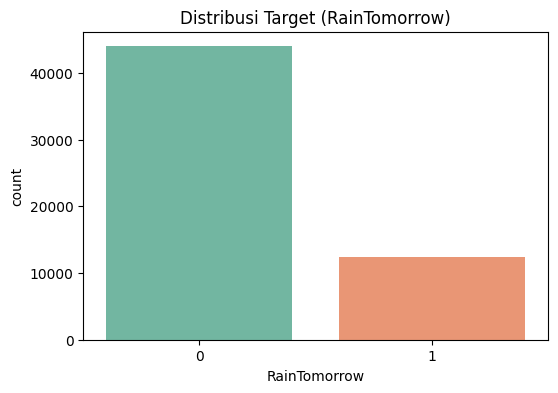

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='RainTomorrow', data=df, palette="Set2")
plt.title("Distribusi Target (RainTomorrow)")
plt.show()

## Total Rainfall Bulanan

/tmp/ipython-input-3032913694.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rain_ts = df['Rainfall'].resample('M').sum()


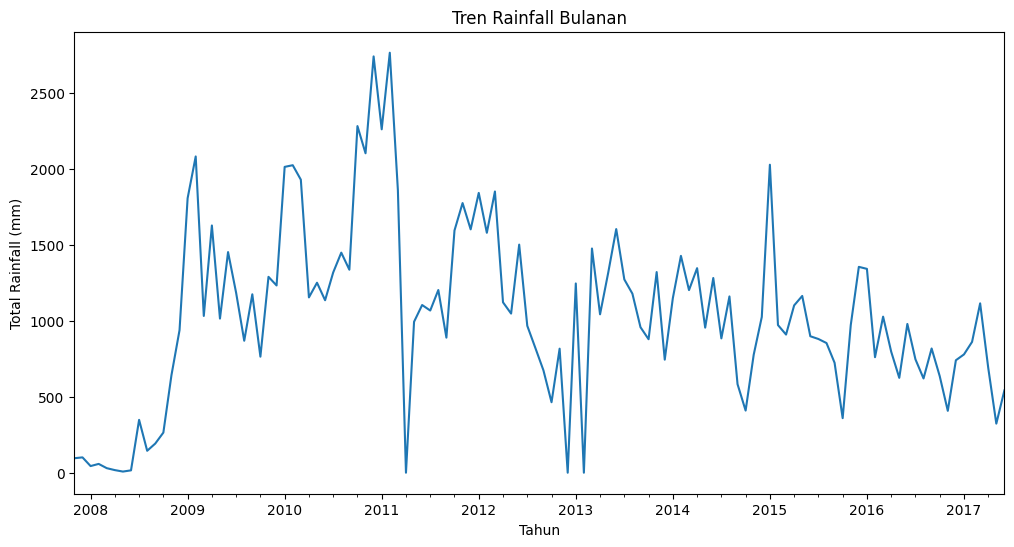

,Month,Rainfall
0,1,2.754224
1,2,2.962071
2,3,2.402319
3,4,2.011940
4,5,1.775429
5,6,2.302760
6,7,1.840348
7,8,1.754928
8,9,1.583980
9,10,1.590148


In [33]:
rain_ts = df['Rainfall'].resample('M').sum()
plt.figure(figsize=(12,6))
rain_ts.plot()
plt.title("Tren Rainfall Bulanan")
plt.ylabel("Total Rainfall (mm)")
plt.xlabel("Tahun")
plt.show()

rain_mean = df.groupby('Month')['Rainfall'].mean().reset_index()
rain_mean

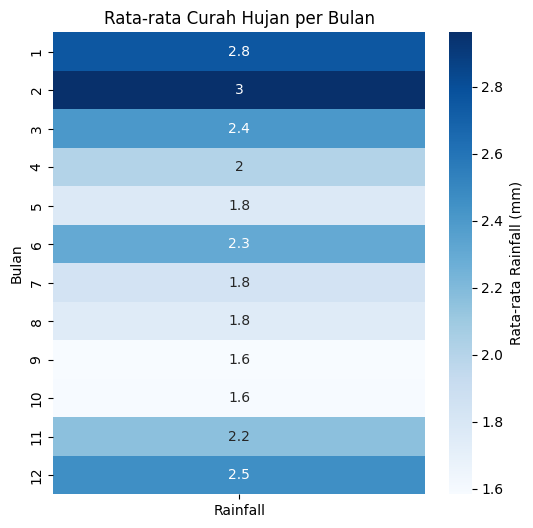

In [53]:
rain_mean = df.groupby('Month')['Rainfall'].mean().reset_index()
rain_mean = rain_mean.sort_values('Month')
rain_pivot = rain_mean.pivot_table(index='Month', values='Rainfall')

plt.figure(figsize=(6,6))
sns.heatmap(rain_pivot, annot=True, cmap='Blues', cbar_kws={'label': 'Rata-rata Rainfall (mm)'})
plt.title("Rata-rata Curah Hujan per Bulan")
plt.ylabel("Bulan")
plt.xlabel("")
plt.show()

Curah hujan tertinggi terjadi pada bulan 2 dan terendah pada bulan 8 hal ini dapat terjadi karena perbedaan iklim.

## Heatmap Korelasi Fitur Numerik

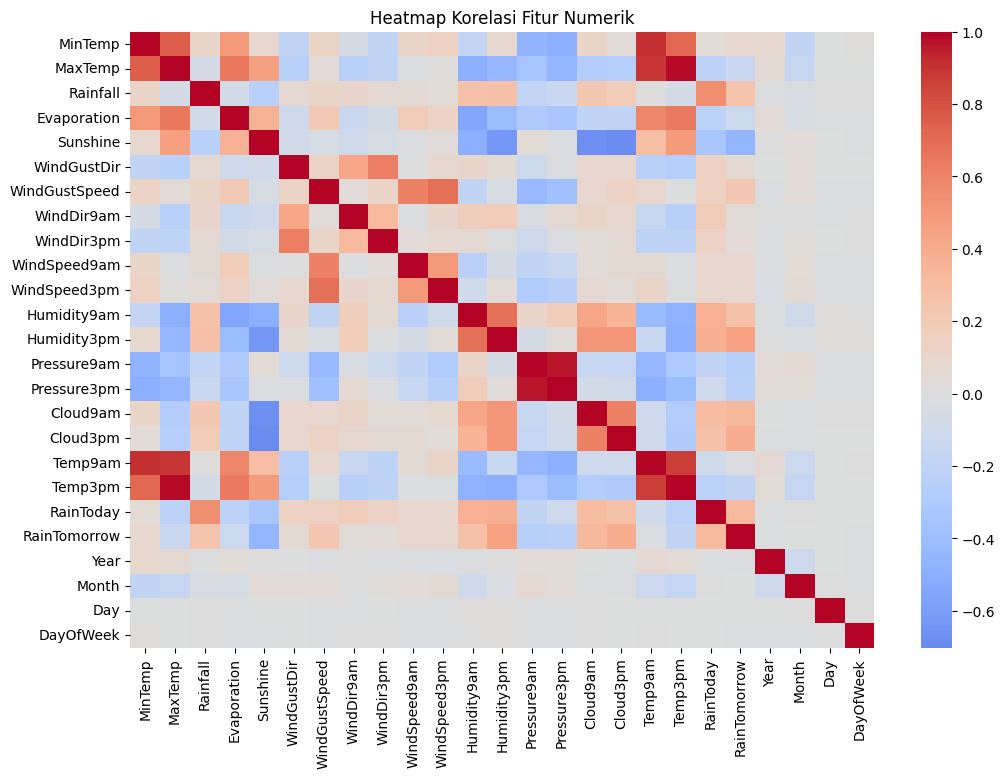

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

Kita bisa melihat pada heatmap diatas bahawa Sunshine dan RainToday itu warna biru lumayan gelap yang menandakan bahwa korelasi anatara Sunshine dan RainTommorow itu negatif dan untuk Humidity3pm dan RainTommorow memiliki korelasi positif.

## Perbandingan kelembapan

/tmp/ipython-input-1380284014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="RainTomorrow", y="Humidity3pm", data=df, palette="Set2")


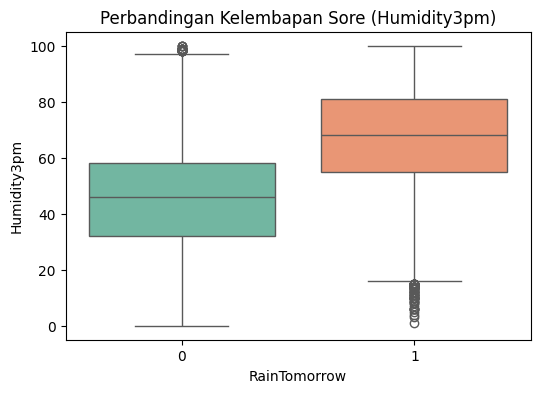

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(x="RainTomorrow", y="Humidity3pm", data=df, palette="Set2")
plt.title("Perbandingan Kelembapan Sore (Humidity3pm)")
plt.show()

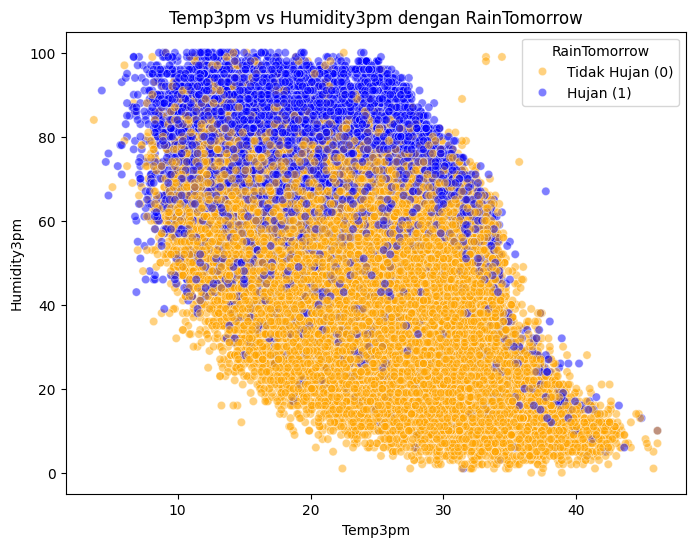

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Temp3pm',
    y='Humidity3pm',
    hue='RainTomorrow',
    data=df,
    palette={0: "orange", 1: "blue"},  # mapping warna
    alpha=0.5
)

plt.title("Temp3pm vs Humidity3pm dengan RainTomorrow")

# Ubah label legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Tidak Hujan (0)", "Hujan (1)"], title="RainTomorrow")

plt.show()

Dapat dilihat jika humidity (kelembapan) jam 3 sore itu tinggi, maka lebih sering terjadi hujan.

kenapa menggunakan kelembabpan jam 3 sore? karena kelebabpan jam 3 sore memiliki korelasi yang lebih kuat di bandingkan kelembabpan jam 9 pagi

Kenapa yang di pakai kelembapan? Karena kelebapan adalah salah satu dari beberapa yang memiliki korelasi yang kuat

## Sunshine vs RainTommorow

/tmp/ipython-input-558796999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RainTomorrow', y='Sunshine', data=df, palette="Set2")


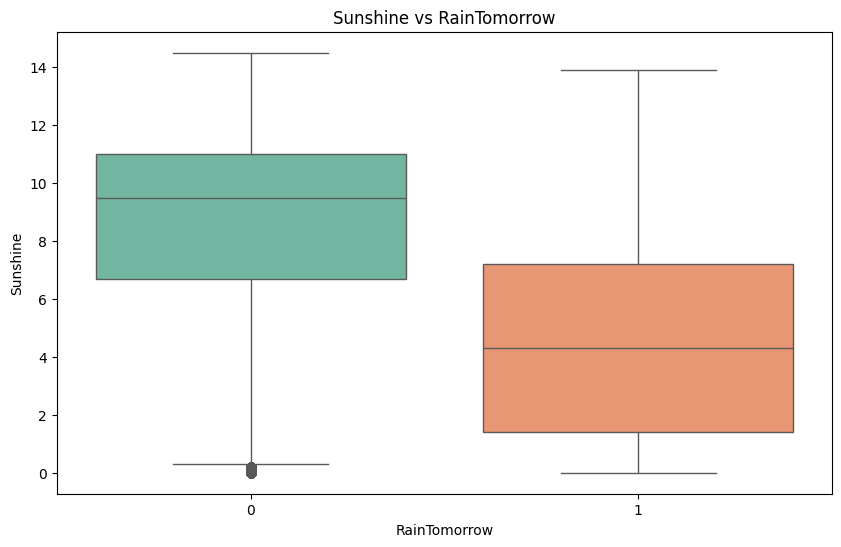

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RainTomorrow', y='Sunshine', data=df, palette="Set2")
plt.title("Sunshine vs RainTomorrow")
plt.show()

## RainToday vs Rain Tomorrow

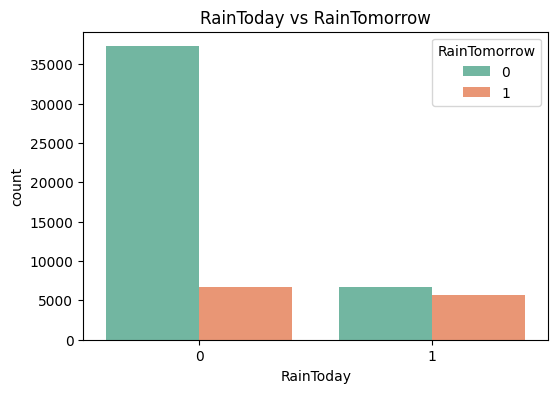

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='RainToday', hue='RainTomorrow', data=df, palette="Set2")
plt.title("RainToday vs RainTomorrow")
plt.show()

## Kota yang paling sering hujan dalam 30 hari terkahir

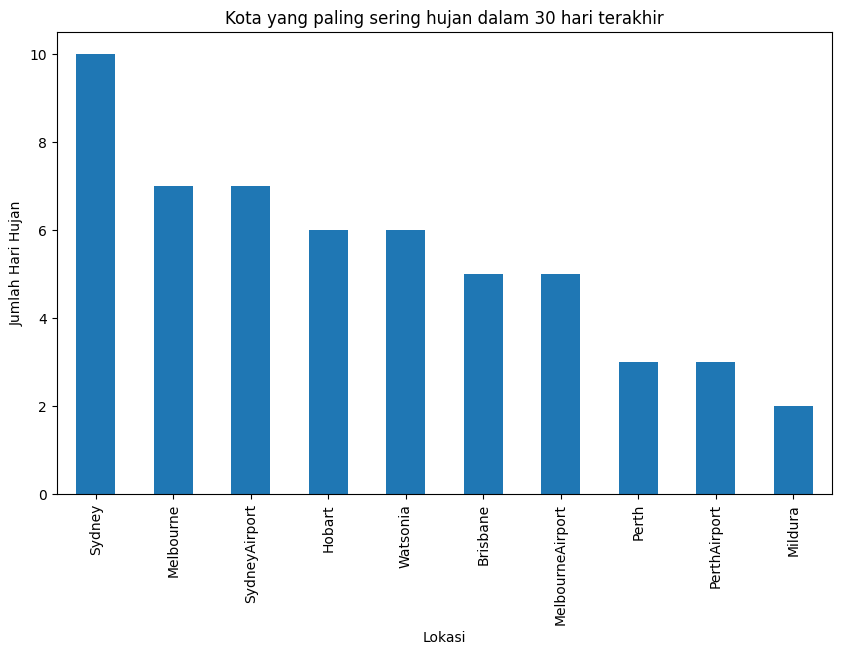

In [39]:
# mencari kota yang paling sering hujan selama 1 tahun terakhir

last_year_df = df[df.index >= '2017-05-24']
location_rain_counts = last_year_df.groupby('Location')['RainToday'].sum()
top_10_locations = location_rain_counts.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_10_locations.plot(kind='bar')
plt.title("Kota yang paling sering hujan dalam 30 hari terakhir")
plt.xlabel("Lokasi")
plt.ylabel("Jumlah Hari Hujan")
plt.show()

Hujan yang paling banyak selama 30 hari terakhir itu Sydney dengan total hujan 10 hari dan disusul oleh Melbourne dan SydneyAirport.

# Machine Learning

## Feature Engineering

In [40]:
def create_features(df):
  # Data di Copy agar dataset asli tidal beruba
  df_features = df.copy()
  # Rolling window features
  df_features['Rainfall_roll3_mean'] = df_features['Rainfall'].rolling(window=3).mean()
  df_features['Rainfall_roll3_max'] = df_features['Rainfall'].rolling(window=3).max()
  df_features['Rainfall_roll3_min'] = df_features['Rainfall'].rolling(window=3).min()
  df_features['Humidity9am_roll3_mean'] = df_features['Humidity9am'].rolling(window=3).mean()
  df_features['Humidity3pm_roll3_mean'] = df_features['Humidity3pm'].rolling(window=3).mean()

  # Lag features
  df_features['Rainfall_lag1'] = df_features['Rainfall'].shift(1)
  df_features['Humidity9am_lag1'] = df_features['Humidity9am'].shift(1)
  df_features['Humidity3pm_lag1'] = df_features['Humidity3pm'].shift(1)

  df_features.dropna(inplace=True)  # Drop NaN dari rolling/lag
  return df_features

In [41]:
df_processed = create_features(df.copy())

In [42]:
# Memisahkan target dan fitur

y = df_processed['RainTomorrow']
X = df_processed.drop([
    'RainTomorrow', 'Location', 'WindGustDir', 'WindDir9am',
    'WindDir3pm', 'Year', 'Month', 'Day', 'DayOfWeek'
], axis=1)

## Split Data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

## Random Forest

In [44]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,            # batasi kedalaman pohon
    min_samples_split=20,    # min sample utk split
    min_samples_leaf=10,     # min sample di tiap leaf
    max_features="sqrt",     # random subset fitur
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=200, n_jobs=-1, random_state=42)

### Evaluasi Model Random Forest

In [45]:
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8421658986175116

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      9033
           1       0.58      0.76      0.66      2251

    accuracy                           0.84     11284
   macro avg       0.76      0.81      0.78     11284
weighted avg       0.86      0.84      0.85     11284


Confusion Matrix:
 [[7792 1241]
 [ 540 1711]]


In [46]:
y_train_pred = rf.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

Accuracy: 0.8435325918376391

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.89     34958
           1       0.61      0.84      0.71     10176

    accuracy                           0.84     45134
   macro avg       0.78      0.84      0.80     45134
weighted avg       0.87      0.84      0.85     45134


Confusion Matrix:
 [[29571  5387]
 [ 1675  8501]]


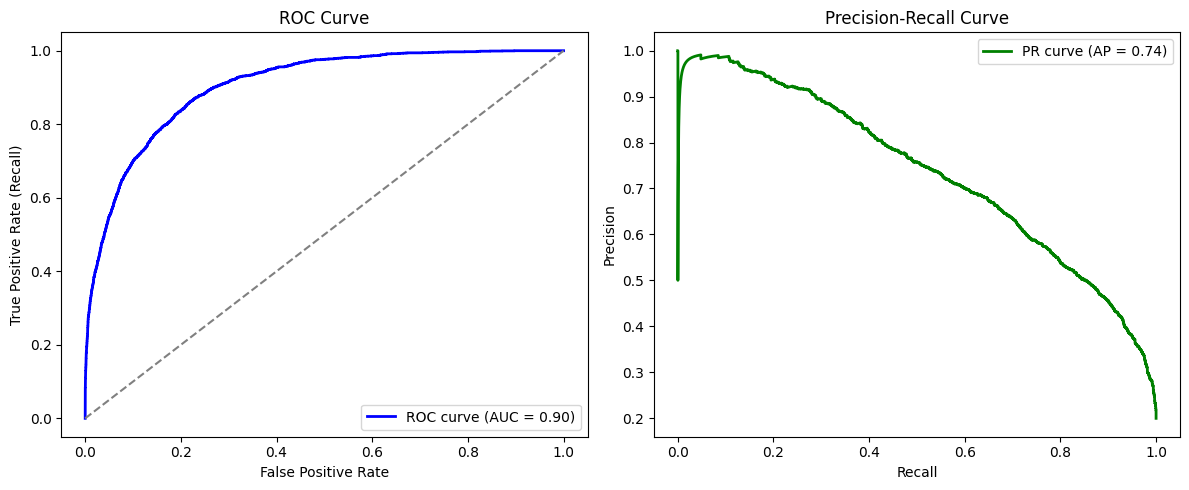

In [47]:

# --- Probabilitas prediksi ---
y_proba = rf.predict_proba(X_test)[:,1]  # ambil probabilitas kelas 1 (hujan)

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,5))

# ROC
plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.subplot(1,2,2)
plt.plot(recall, precision, color='green', lw=2,
         label='PR curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

### Feature Importance Random Forest

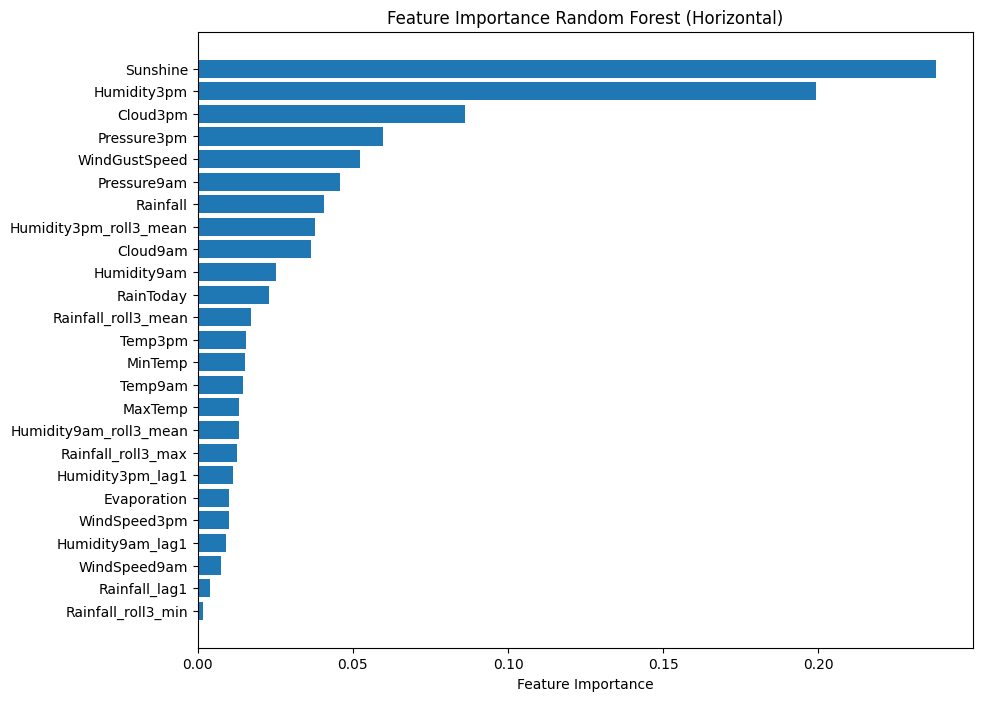

In [48]:
importances = rf.feature_importances_
features = X.columns

indices = importances.argsort()

plt.figure(figsize=(10,8))
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance Random Forest (Horizontal)")
plt.show()

## XGBoost

In [49]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate = 0.05,
    max_depth = 6,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state=42,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

### Evaluasi XGBoost

In [50]:
y_predXGB = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_predXGB))
print("\nClassification Report:\n", classification_report(y_test, y_predXGB))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predXGB))

Accuracy: 0.8350762141084722

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      9033
           1       0.56      0.79      0.66      2251

    accuracy                           0.84     11284
   macro avg       0.75      0.82      0.77     11284
weighted avg       0.87      0.84      0.84     11284


Confusion Matrix:
 [[7648 1385]
 [ 476 1775]]


In [51]:
y_train_predXGB = xgb.predict(X_train)

print("=== Train Performance ===")
print("Accuracy:", accuracy_score(y_train, y_train_predXGB))
print("\nClassification Report:\n", classification_report(y_train, y_train_predXGB))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_predXGB))

=== Train Performance ===
Accuracy: 0.8624540257898702

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91     34958
           1       0.64      0.88      0.74     10176

    accuracy                           0.86     45134
   macro avg       0.80      0.87      0.82     45134
weighted avg       0.89      0.86      0.87     45134

Confusion Matrix:
 [[29964  4994]
 [ 1214  8962]]


## Perbandingan akurasi XGBoost dan Random Forest

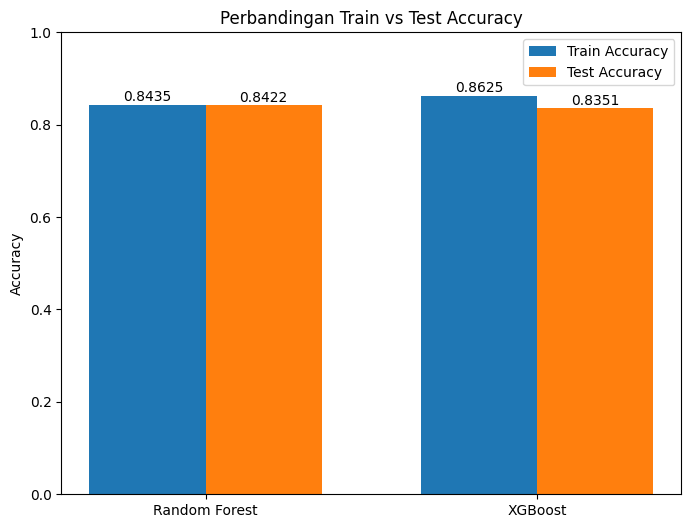

In [52]:
# Barchart Untuk akurasi Train dan Test untuk XGboost dan Random Forest

models = {
    "Random Forest": rf,
    "XGBoost": xgb
}

train_acc = []
test_acc = []

for name, model in models.items():

  y_train_pred = model.predict(X_train)
  acc_train = accuracy_score(y_train, y_train_pred)
  train_acc.append(acc_train)

  y_test_pred = model.predict(X_test)
  acc_test = accuracy_score(y_test, y_test_pred)
  test_acc.append(acc_test)

x = np.arange(len(models))  # posisi x
width = 0.35  # lebar bar

plt.figure(figsize=(8,6))
bars1 = plt.bar(x - width/2, train_acc, width, label='Train Accuracy')
bars2 = plt.bar(x + width/2, test_acc, width, label='Test Accuracy')

# kasih nilai di atas bar
for bar in bars1 + bars2:
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
           f"{bar.get_height():.4f}", ha='center', va='bottom')

plt.xticks(x, models.keys())
plt.ylim(0,1.0)
plt.ylabel("Accuracy")
plt.title("Perbandingan Train vs Test Accuracy")
plt.legend()
plt.show()